In [580]:
# %%capture
# %run final_chars_classification.ipynb



In [581]:
%run table_detector.ipynb

In [582]:
%run final_functions.ipynb

In [583]:
%run preprocessing.ipynb

In [584]:
%run get_rows_number.ipynb

In [585]:
# initialize_models(True)
load_models()

In [586]:
from tabular import tabular
import math

In [587]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, showTrace)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        for i in  cells[col_num:]:
            show_images([i])
            print("out", classify(i, is_0_1=True, is_table=is_table))
        
        numbers = [int(i) for i in numbers]
        
        if True:
            print(letters)
            print(numbers)
            print('rows numbers ' + str(row_num))
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(f"num_outputs: {num_outputs}")
        solver.solve(cells=numbers, num_col=col_num, num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = []
        for ex in expressions:
            try:
                ex[1] ='='
                result.append(get_table(ex))
            except:
                result.append('error')
        
        for r in result:
            print(r)

In [588]:
image = cv2.imread("./test_images/ex2.jpg") # TEST R
# image = cv2.imread("./test_images/ex1.jpg")
# image = cv2.imread("./test_images/t2.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t29.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t30.jpg") # TEST R

# result = solve_expression(image, is_table=False, showTrace=True)




LEN Contours 199
198
6 33


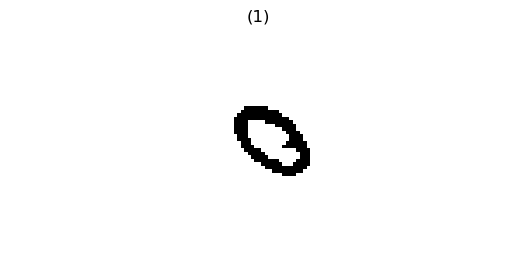

out ['0']


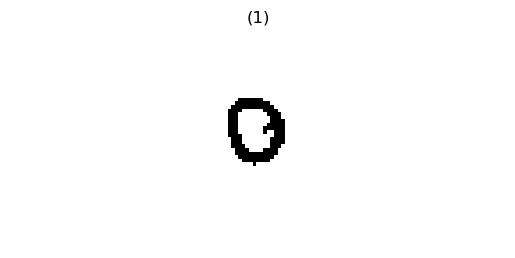

out ['0']


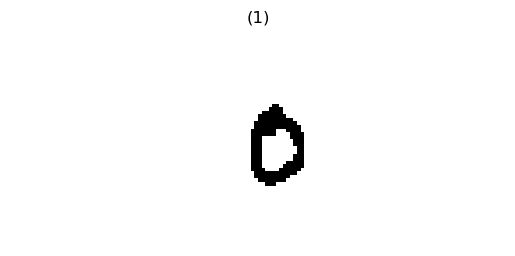

out ['0']


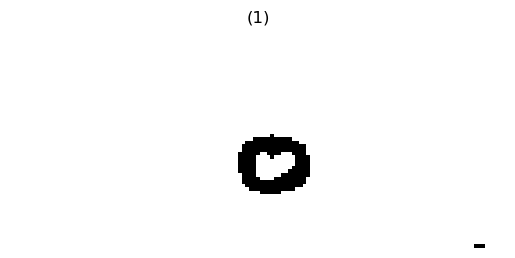

out ['0']


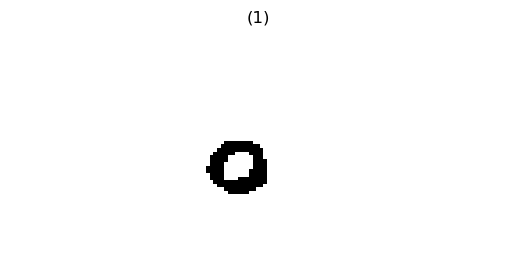

out ['0']


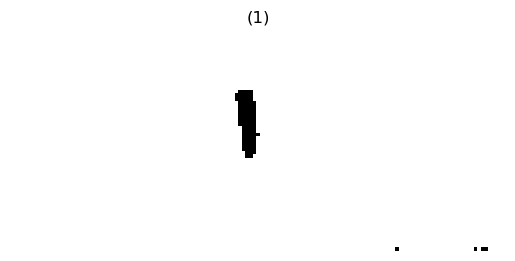

out ['1']


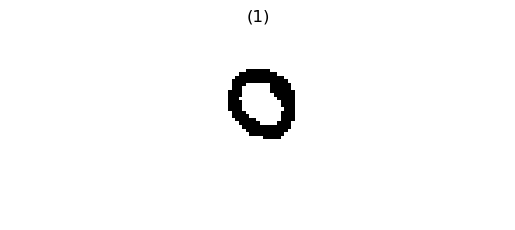

out ['0']


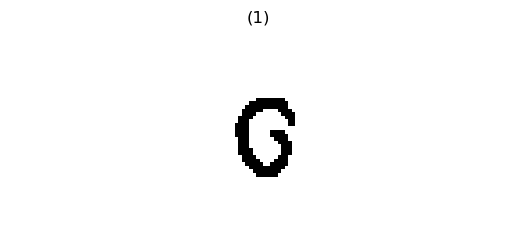

out ['0']


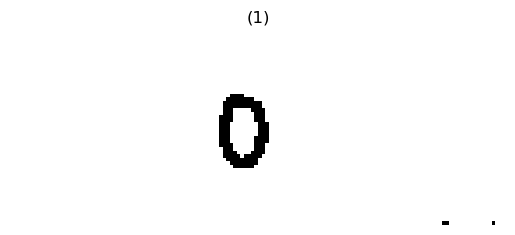

out ['0']


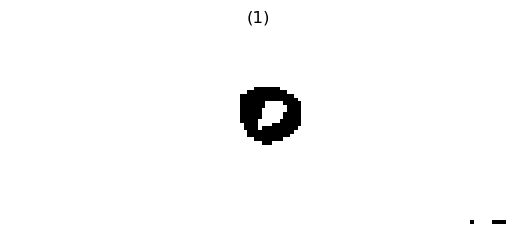

out ['0']


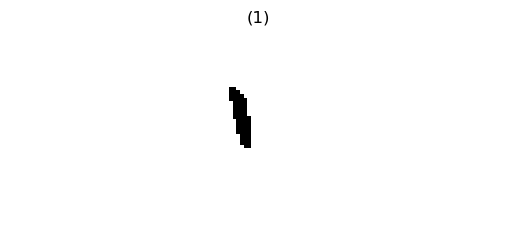

out ['1']


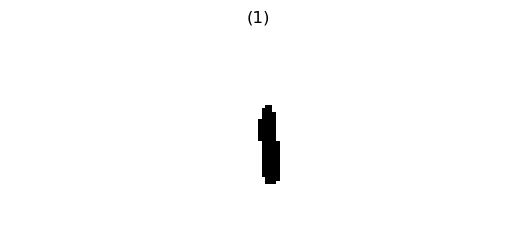

out ['1']


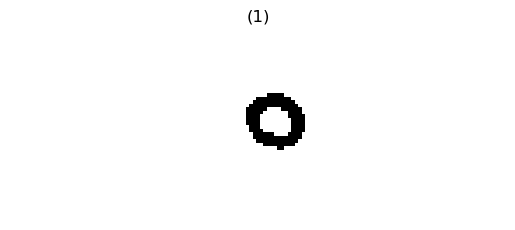

out ['0']


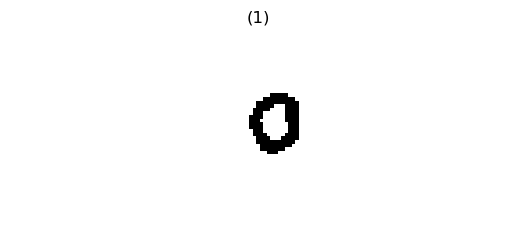

out ['0']


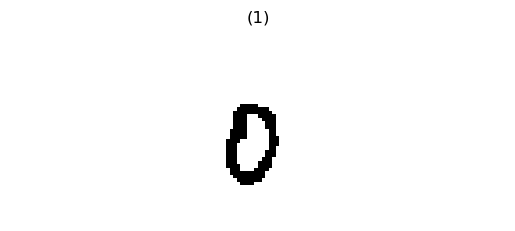

out ['0']


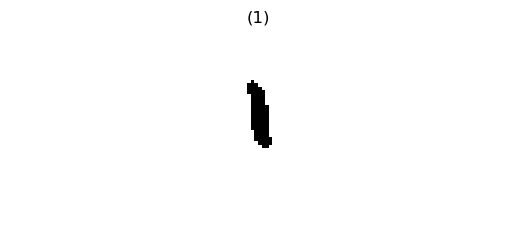

out ['1']


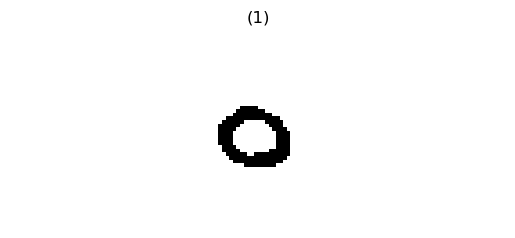

out ['0']


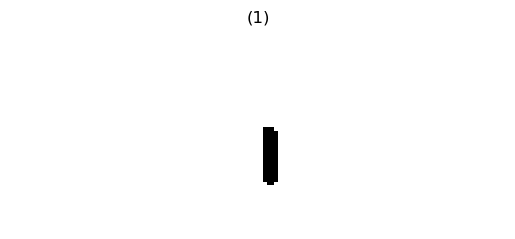

out ['1']


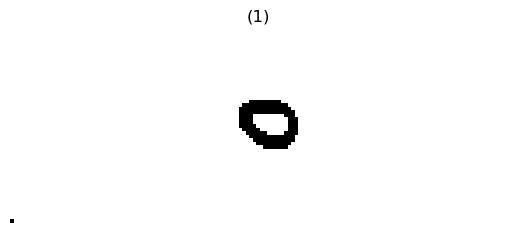

out ['0']


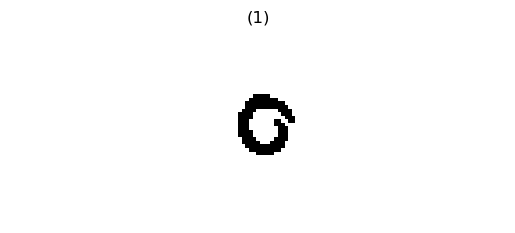

out ['0']


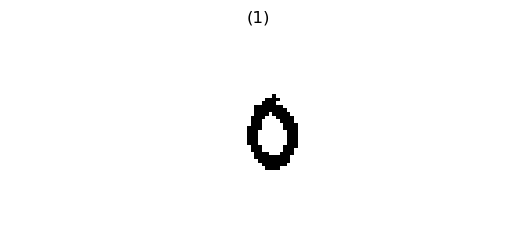

out ['0']


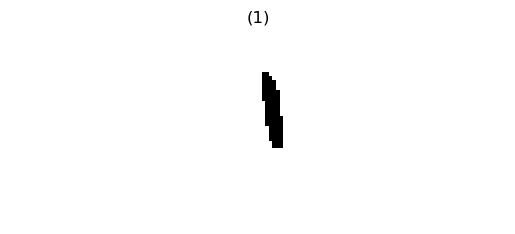

out ['1']


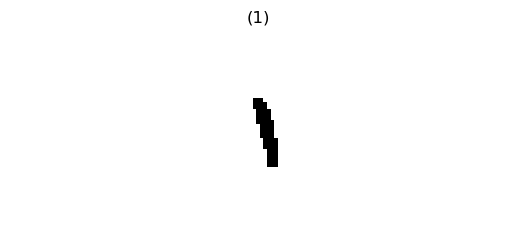

out ['1']


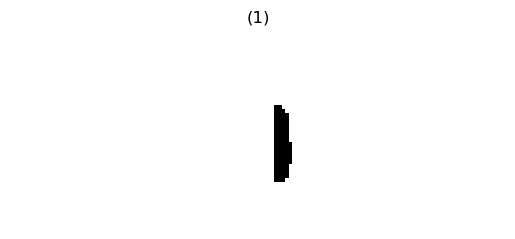

out ['1']


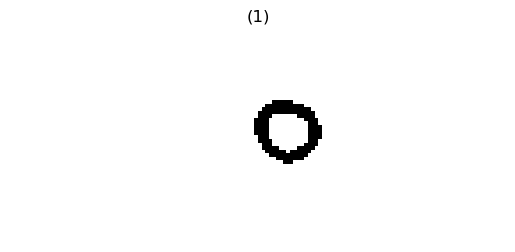

out ['0']


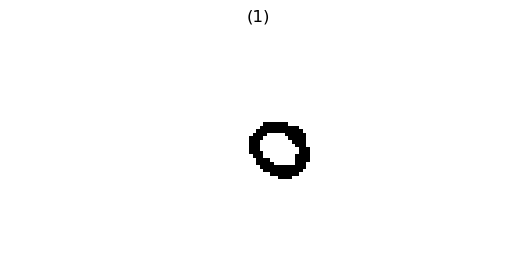

out ['0']


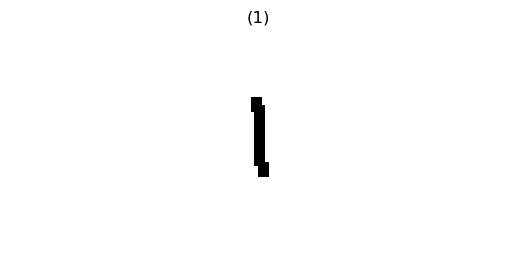

out ['1']


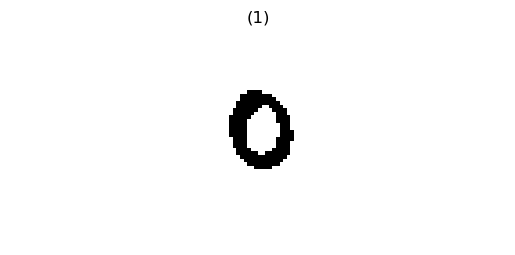

out ['0']


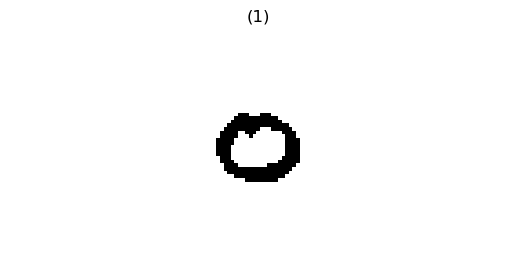

out ['0']


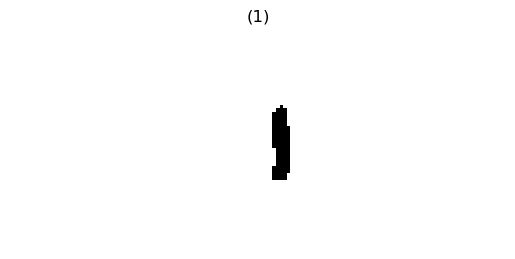

out ['1']


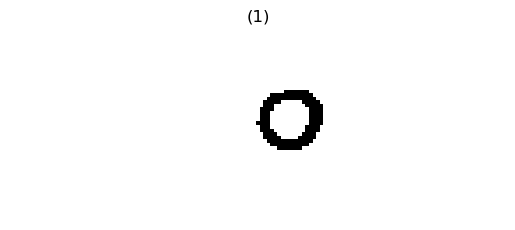

out ['0']


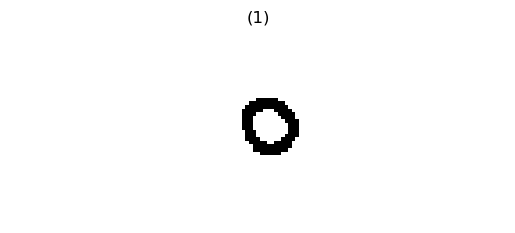

out ['0']


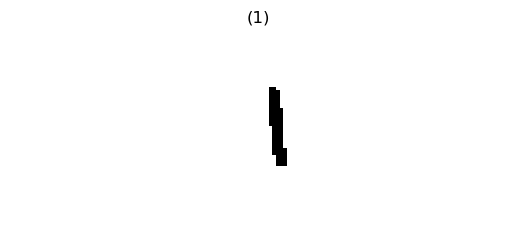

out ['1']


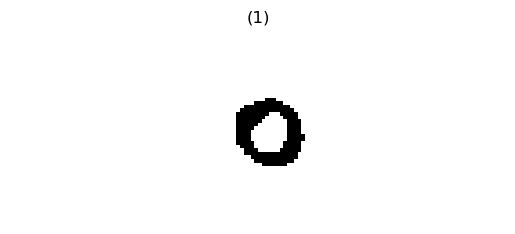

out ['0']


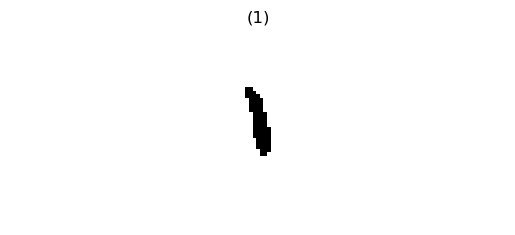

out ['1']


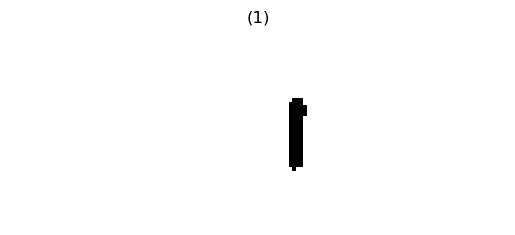

out ['1']


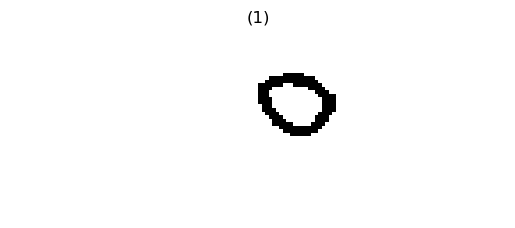

out ['0']


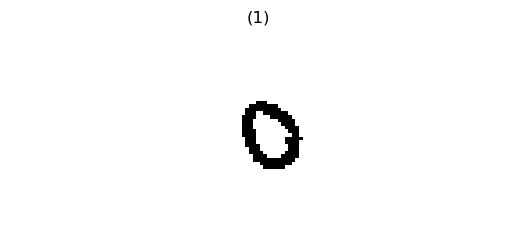

out ['0']


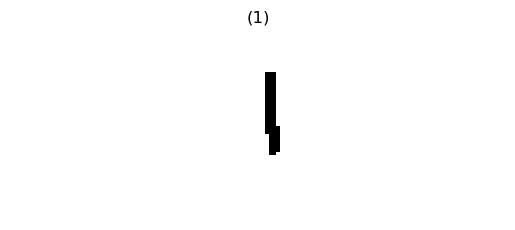

out ['1']


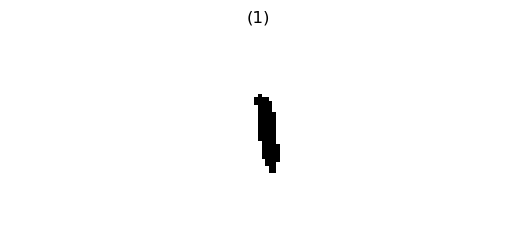

out ['1']


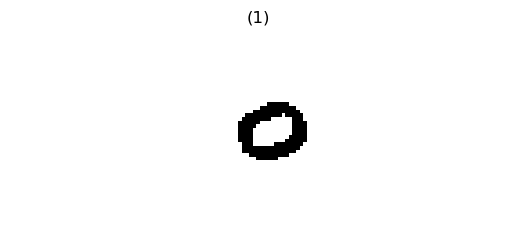

out ['0']


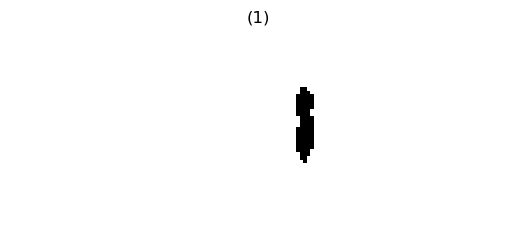

out ['1']


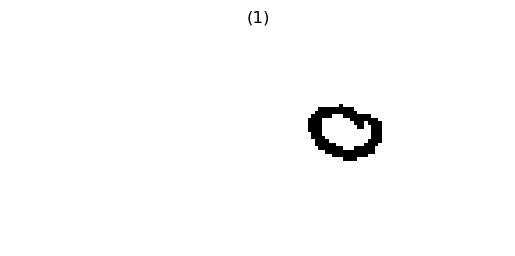

out ['0']


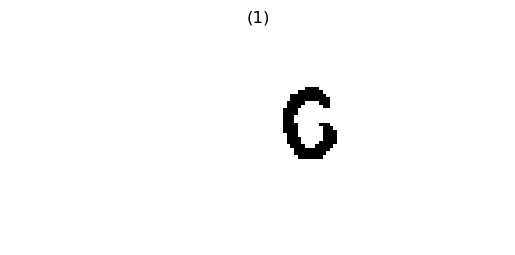

out ['0']


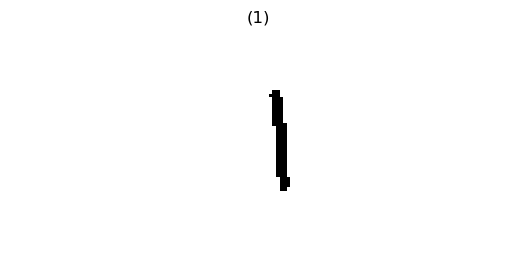

out ['1']


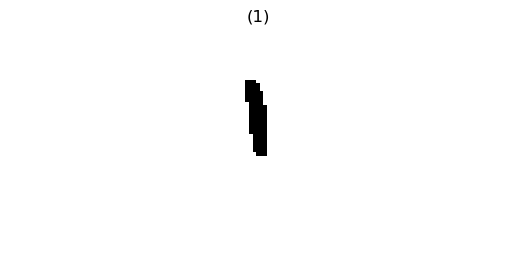

out ['1']


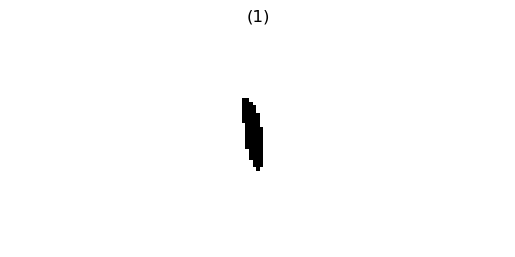

out ['1']


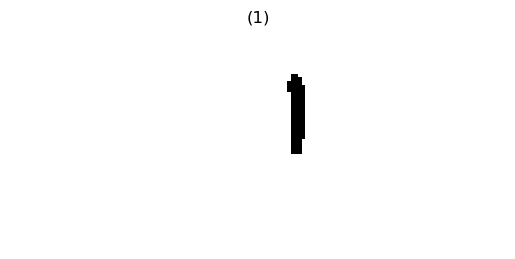

out ['1']


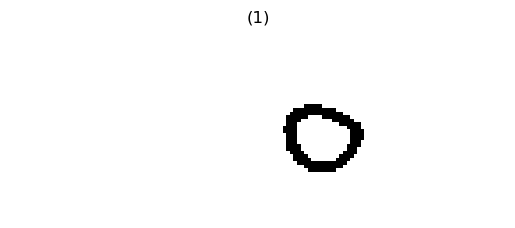

out ['0']


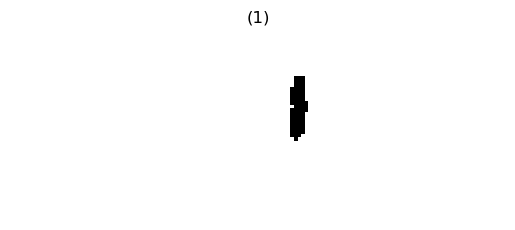

out ['1']


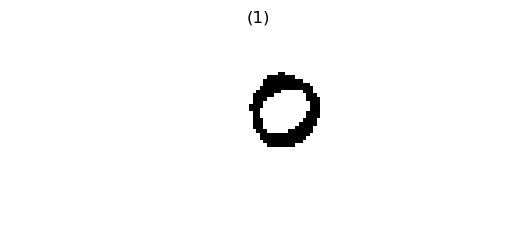

out ['0']


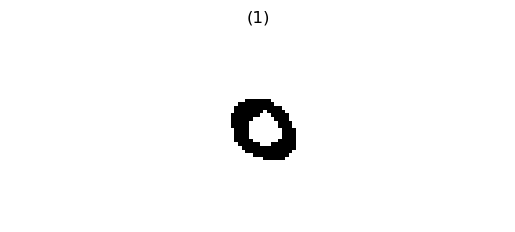

out ['0']


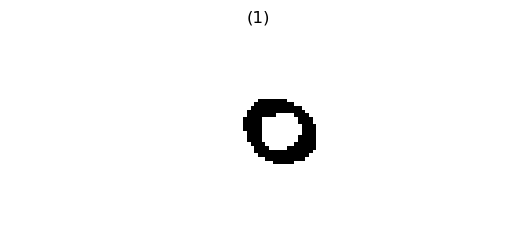

out ['0']


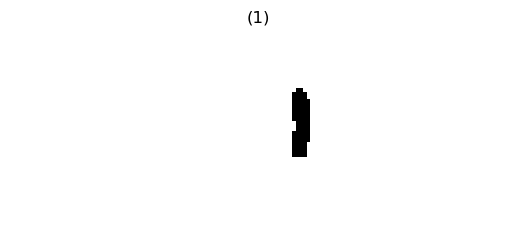

out ['1']


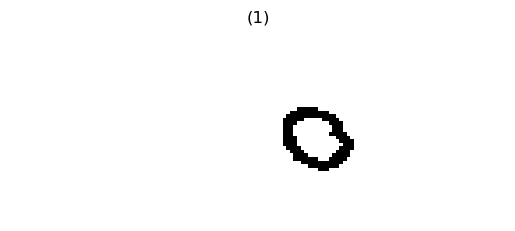

out ['0']


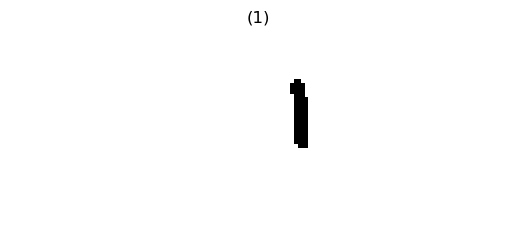

out ['1']


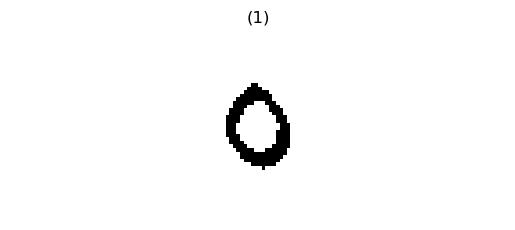

out ['0']


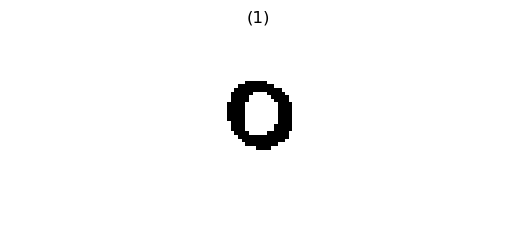

out ['0']


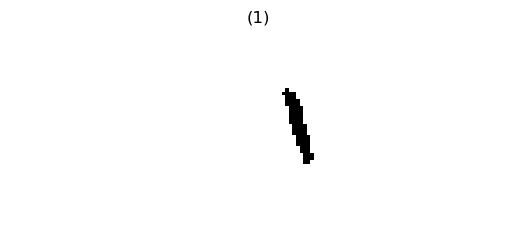

out ['1']


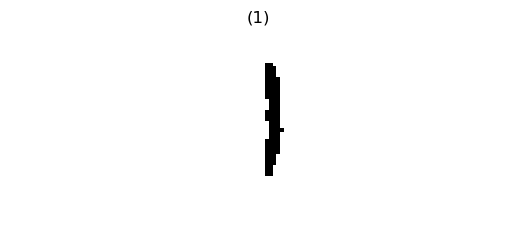

out ['1']


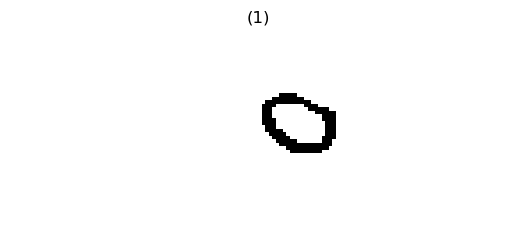

out ['0']


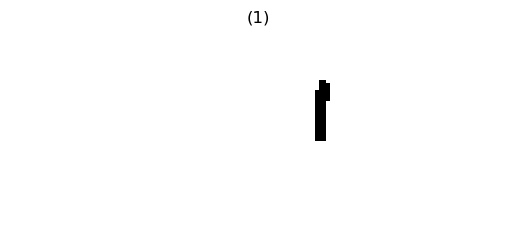

out ['1']


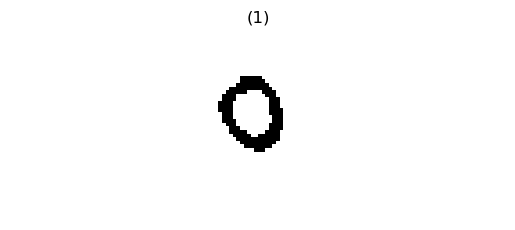

out ['0']


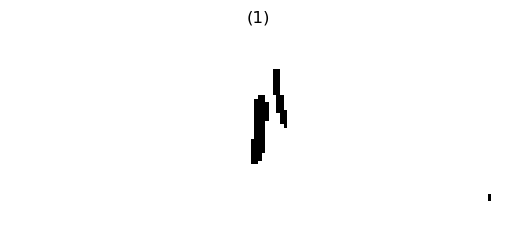

out ['1']


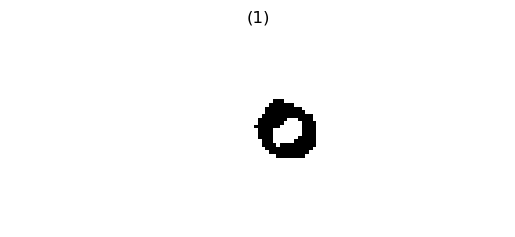

out ['0']


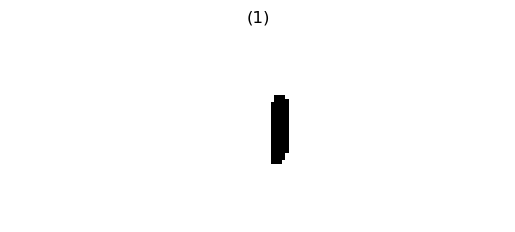

out ['0']


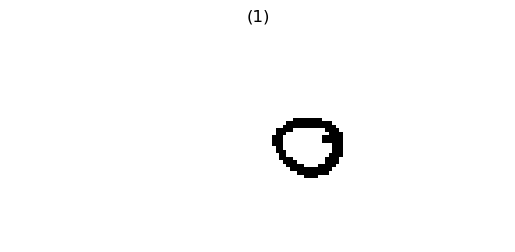

out ['0']


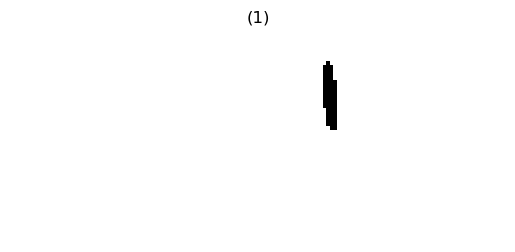

out ['1']


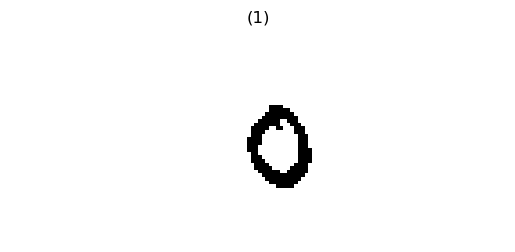

out ['0']


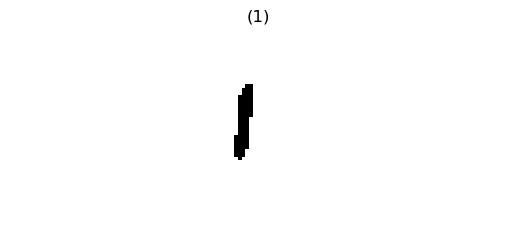

out ['1']


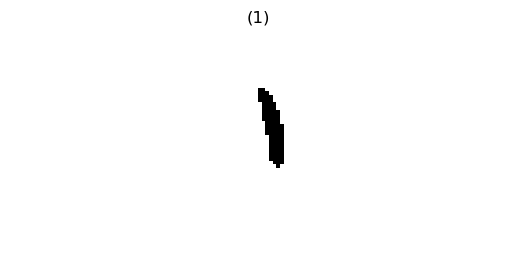

out ['1']


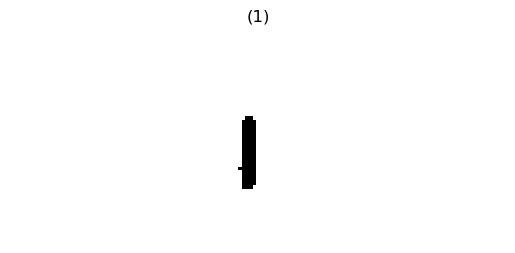

out ['1']


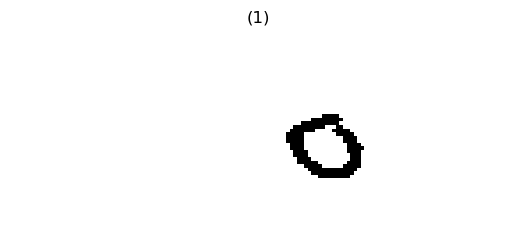

out ['0']


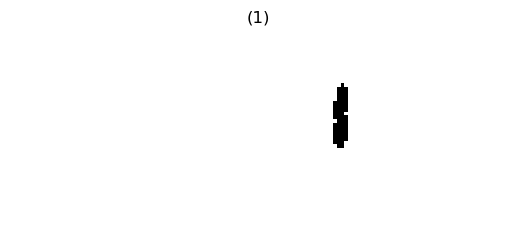

out ['1']


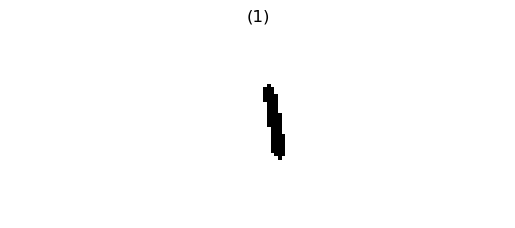

out ['1']


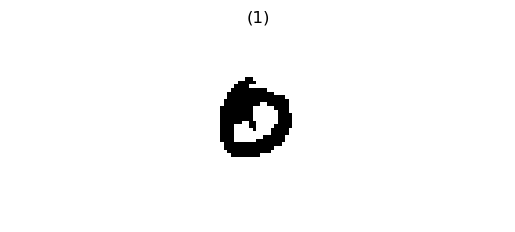

out ['0']


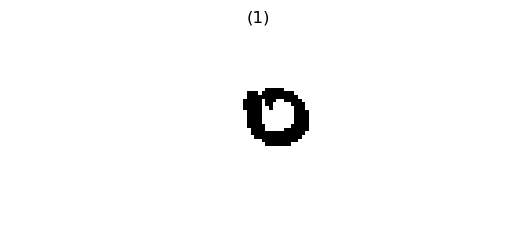

out ['0']


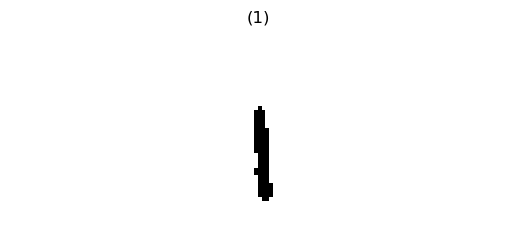

out ['1']


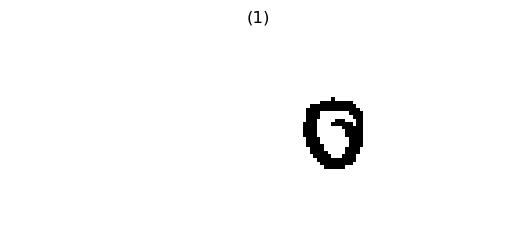

out ['0']


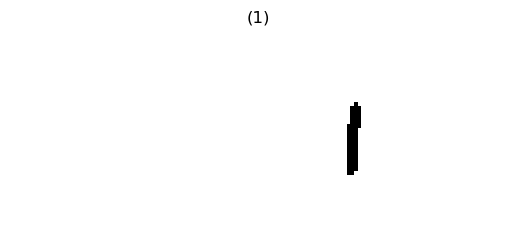

out ['1']


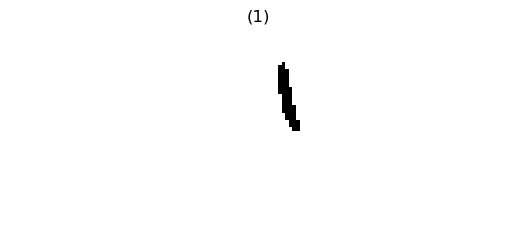

out ['1']


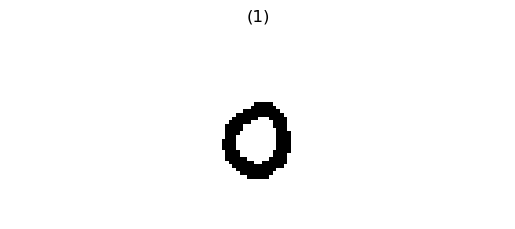

out ['0']


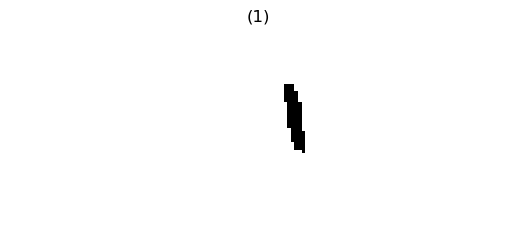

out ['1']


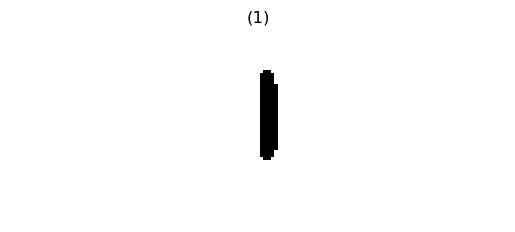

out ['1']


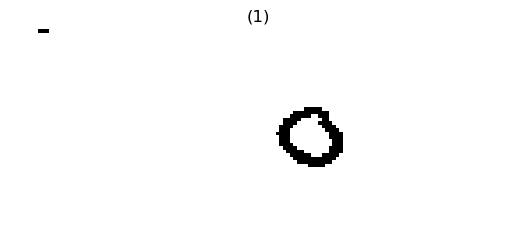

out ['0']


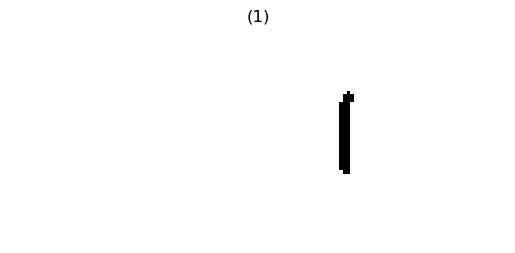

out ['1']


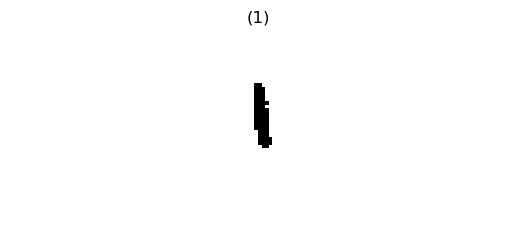

out ['1']


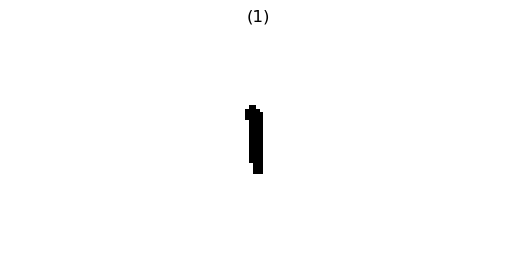

out ['1']


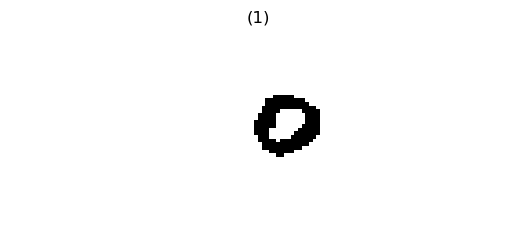

out ['0']


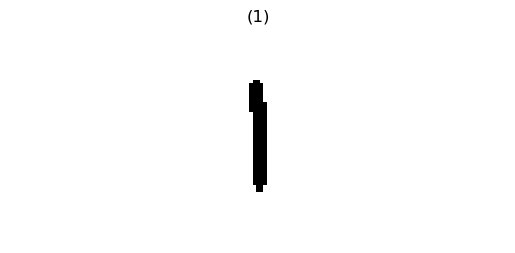

out ['1']


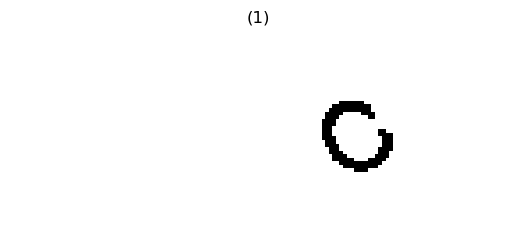

out ['0']


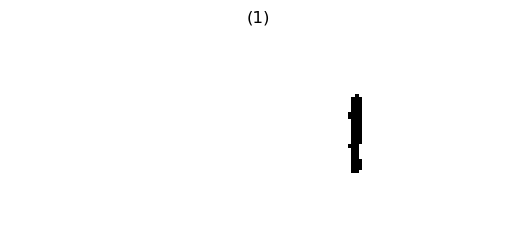

out ['1']


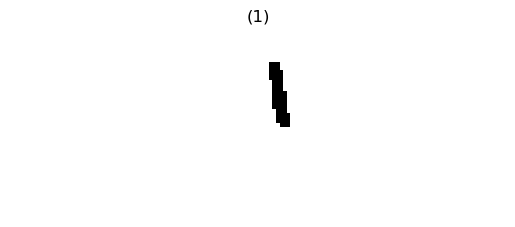

out ['1']


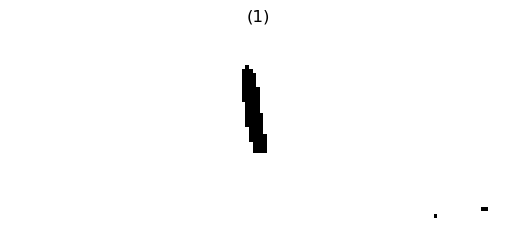

out ['1']


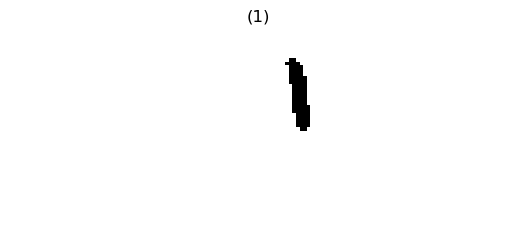

out ['1']


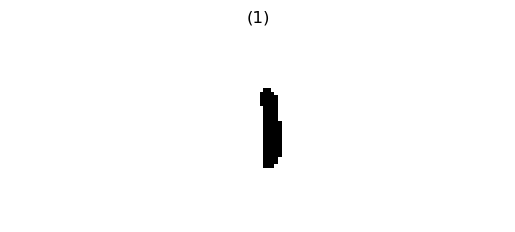

out ['1']


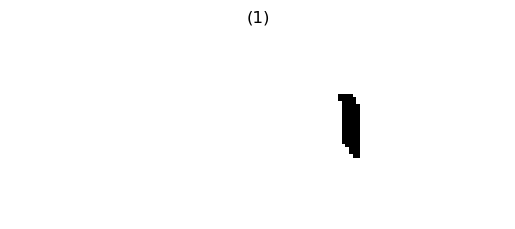

out ['1']


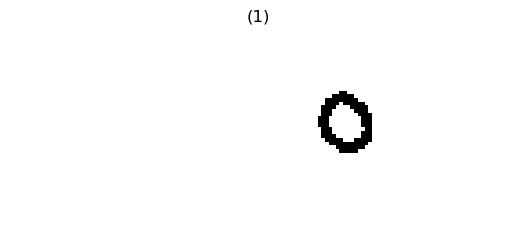

out ['0']


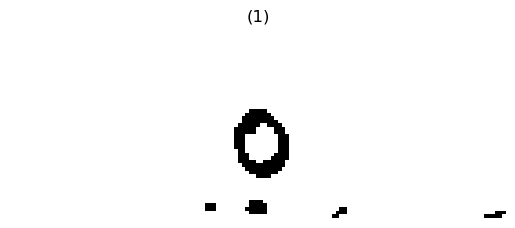

out ['0']


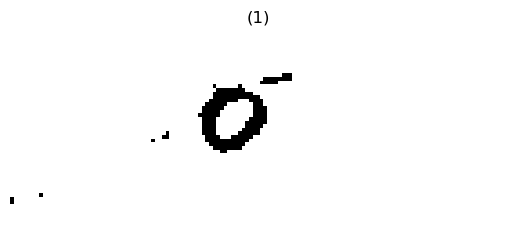

out ['0']


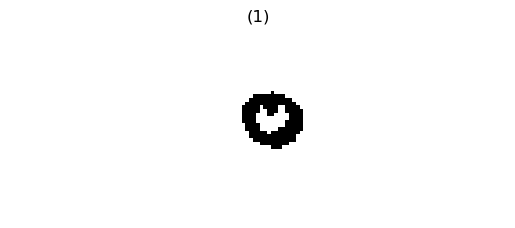

out ['0']


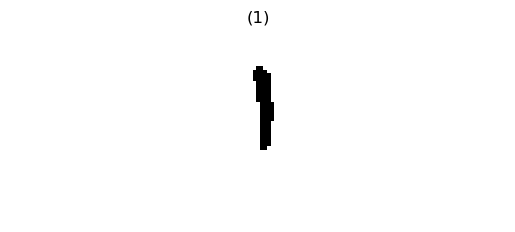

out ['1']


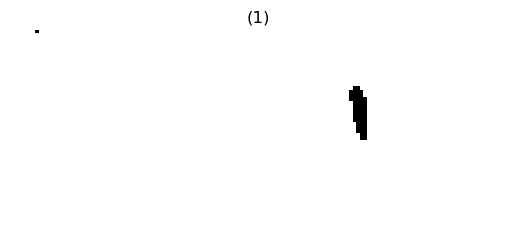

out ['1']


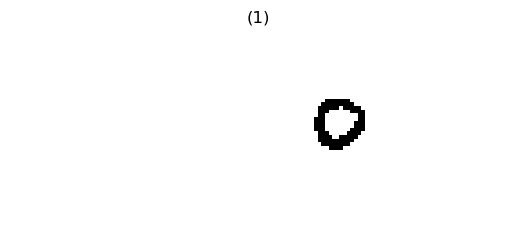

out ['0']


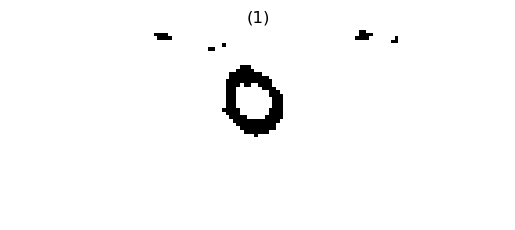

out ['0']


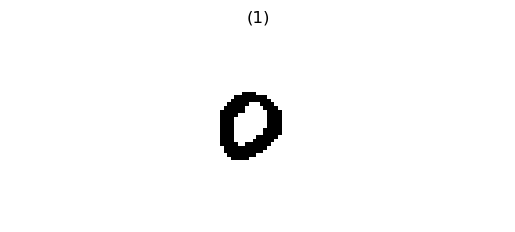

out ['0']


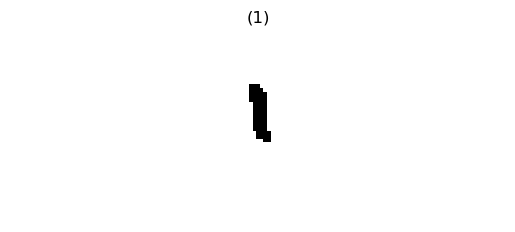

out ['0']


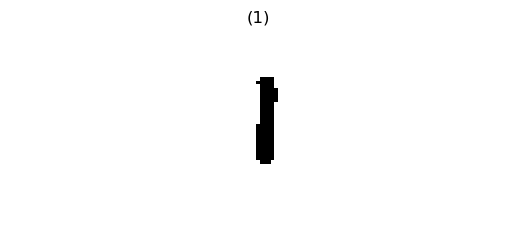

out ['1']


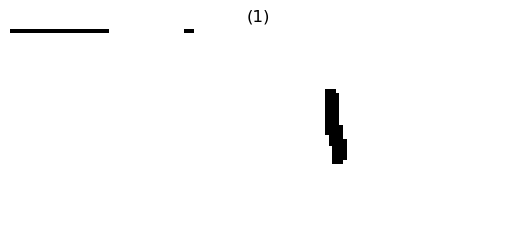

out ['1']


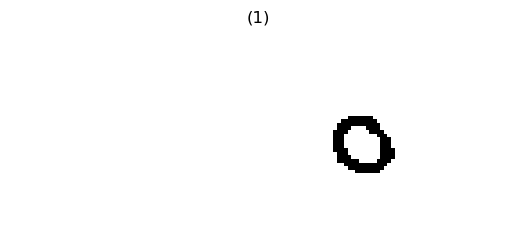

out ['0']


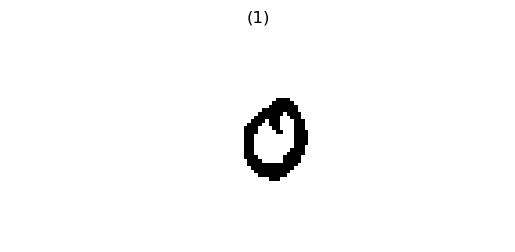

out ['0']


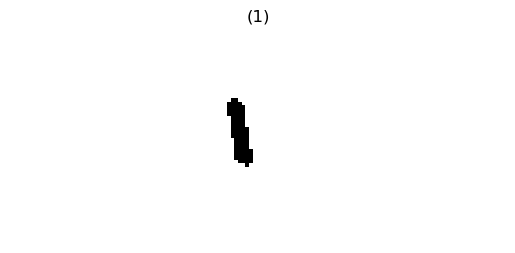

out ['1']


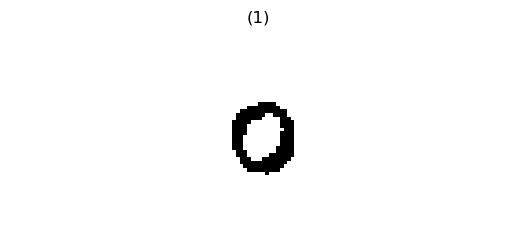

out ['0']


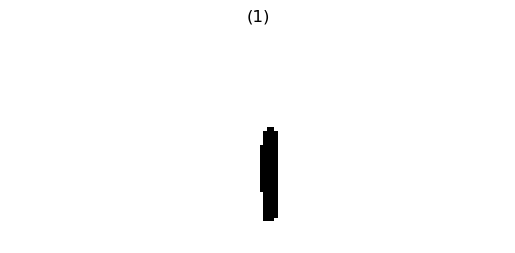

out ['1']


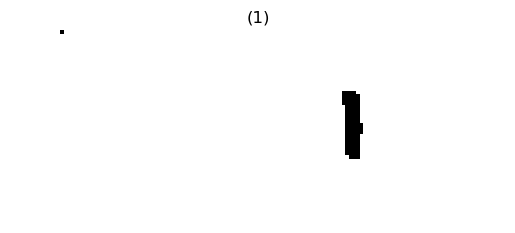

out ['1']


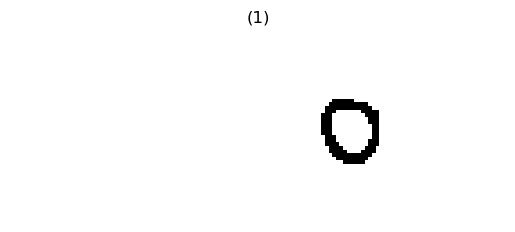

out ['0']


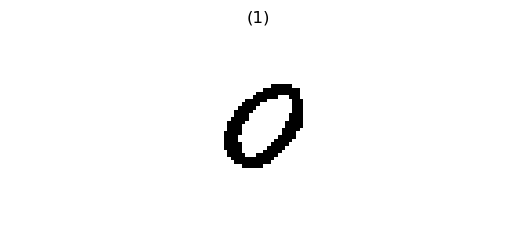

out ['0']


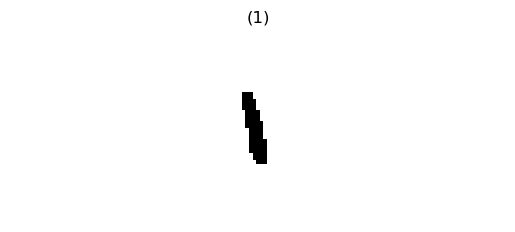

out ['1']


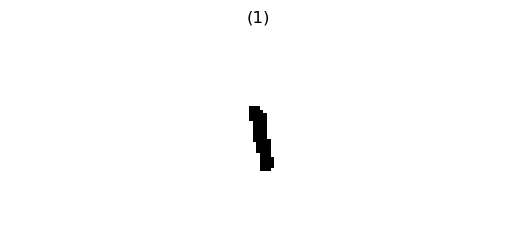

out ['1']


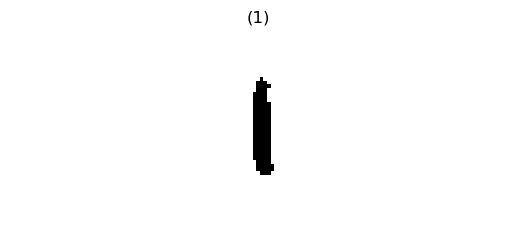

out ['1']


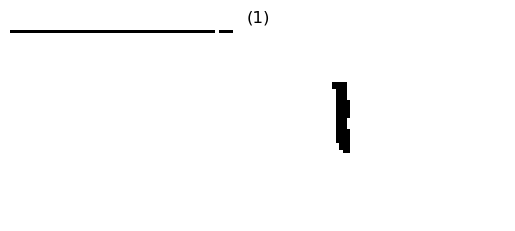

out ['1']


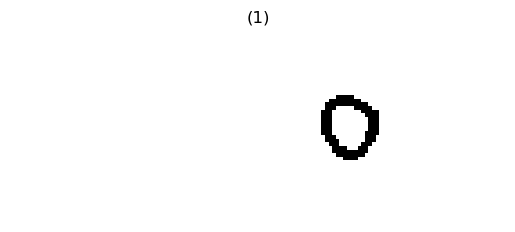

out ['0']


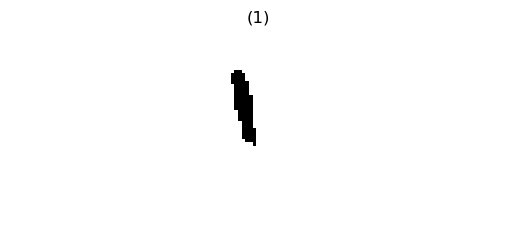

out ['1']


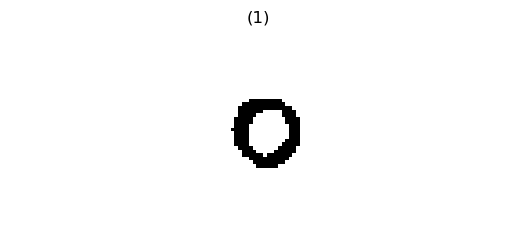

out ['0']


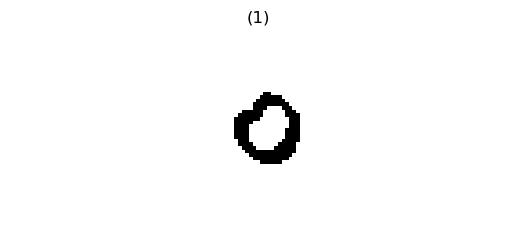

out ['0']


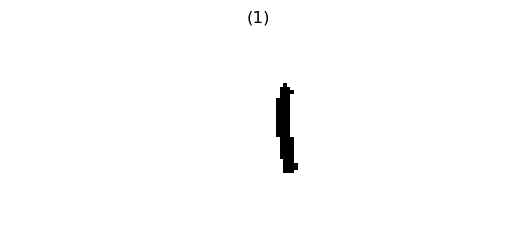

out ['1']


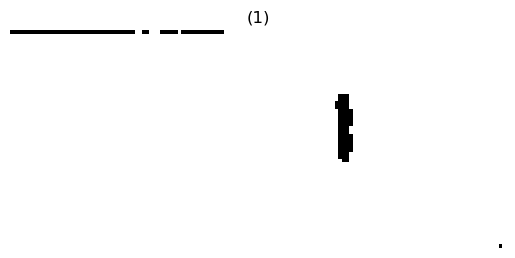

out ['1']


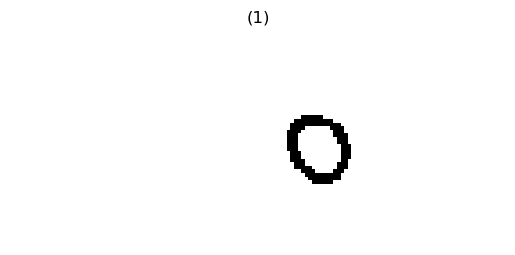

out ['0']


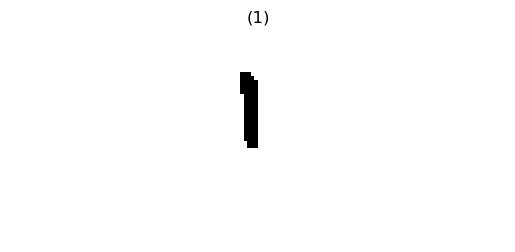

out ['1']


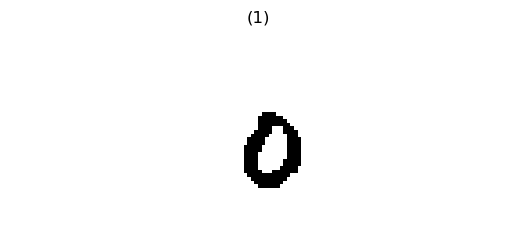

out ['0']


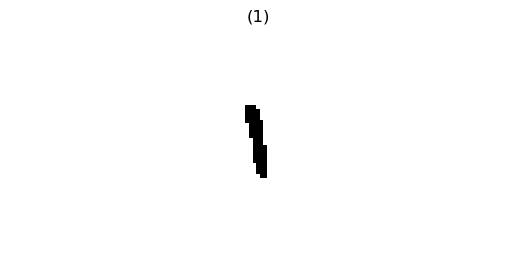

out ['1']


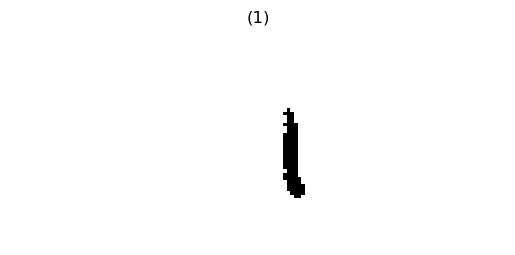

out ['1']


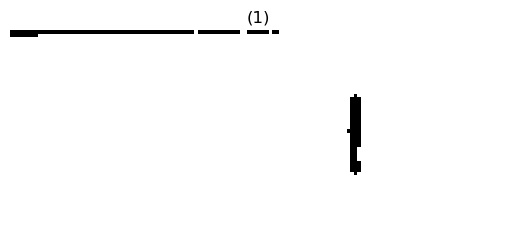

out ['1']


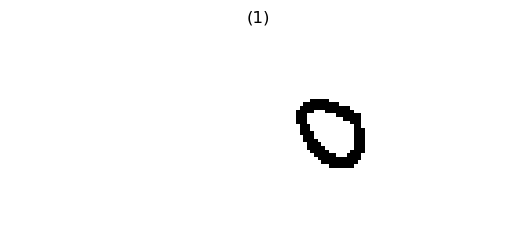

out ['0']


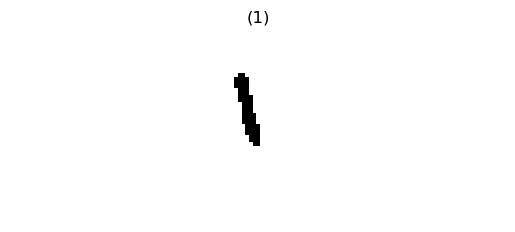

out ['1']


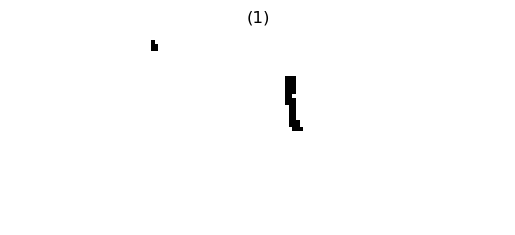

out ['1']


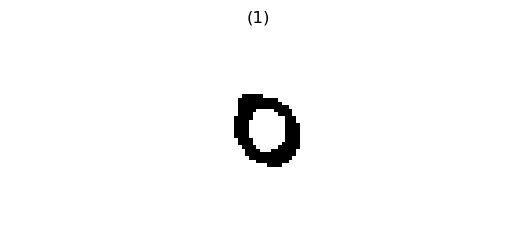

out ['0']


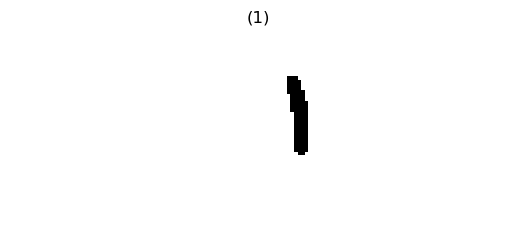

out ['1']


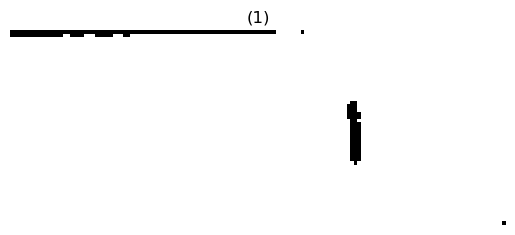

out ['1']


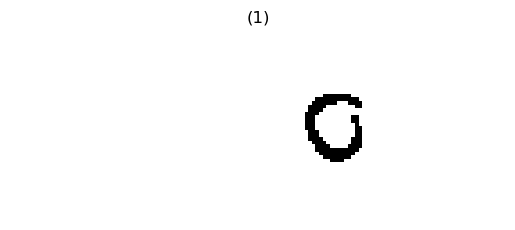

out ['0']


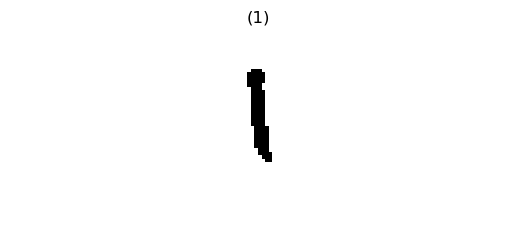

out ['1']


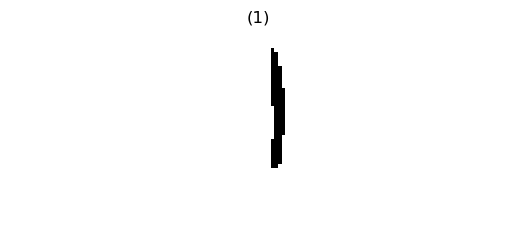

out ['1']


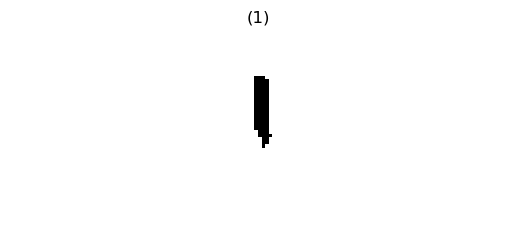

out ['1']


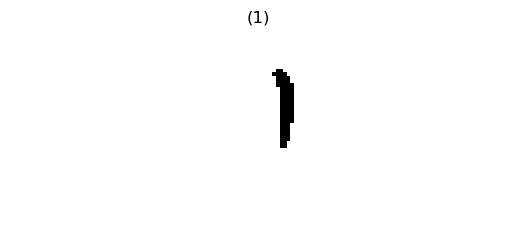

out ['1']


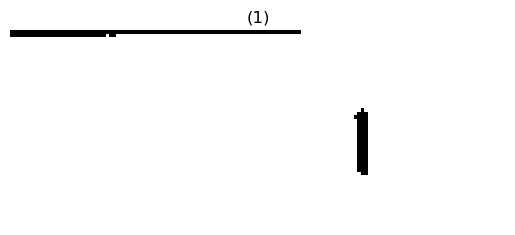

out ['1']


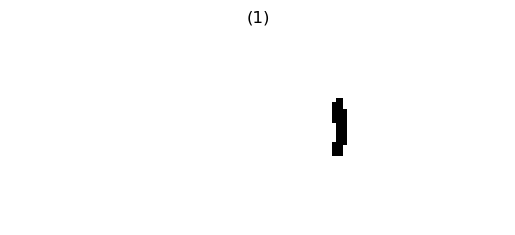

out ['1']


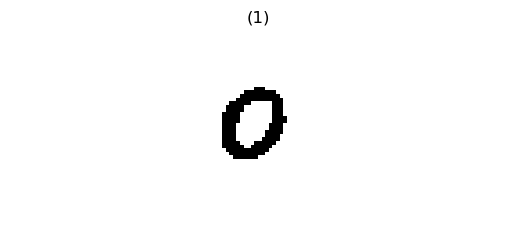

out ['0']


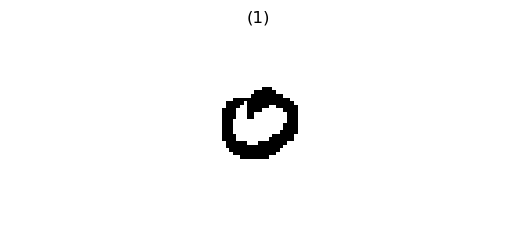

out ['0']


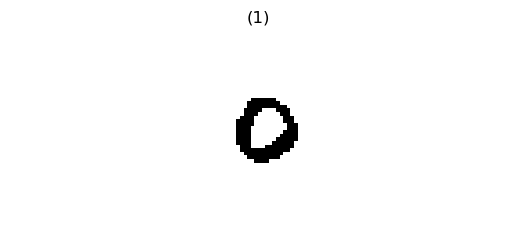

out ['0']


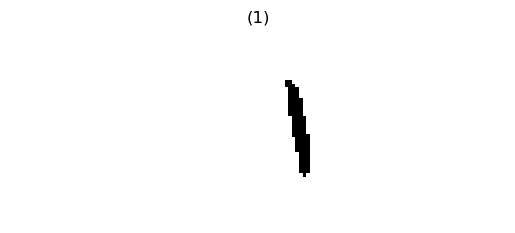

out ['1']


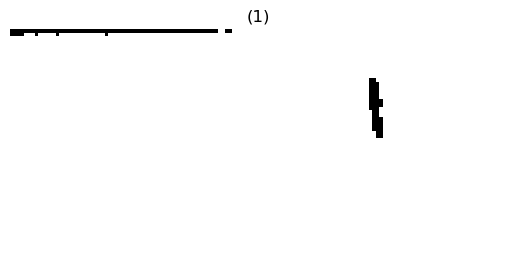

out ['1']


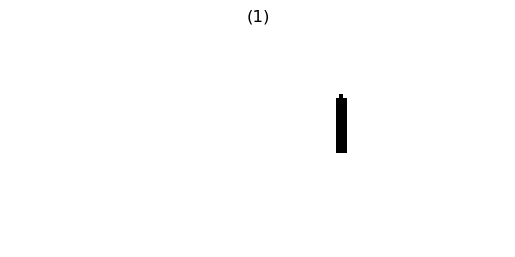

out ['1']


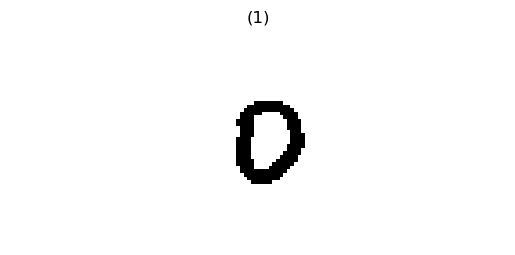

out ['0']


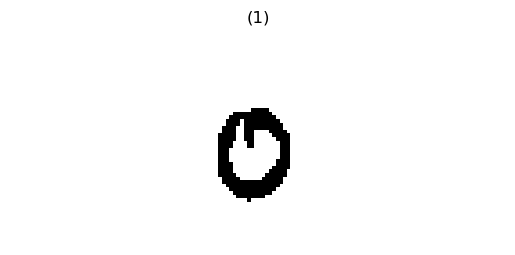

out ['0']


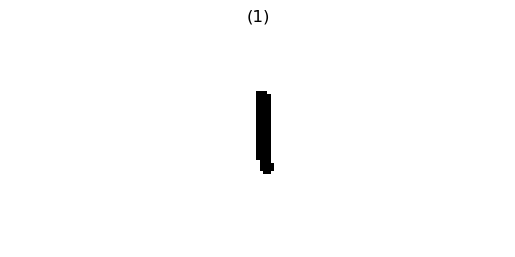

out ['1']


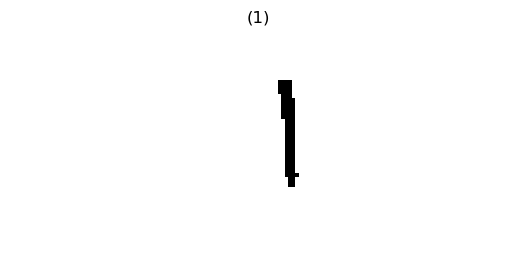

out ['1']


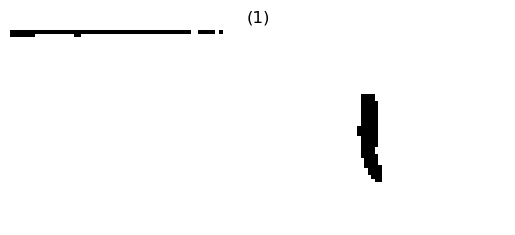

out ['1']


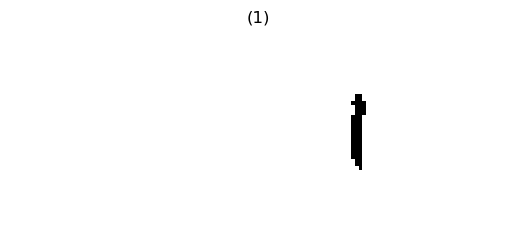

out ['1']


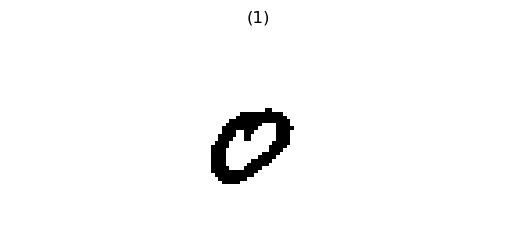

out ['0']


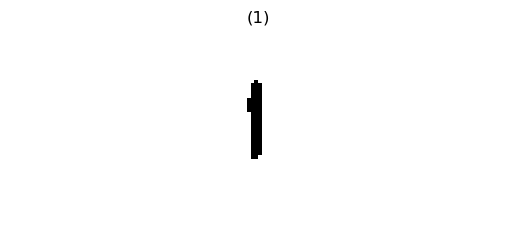

out ['1']


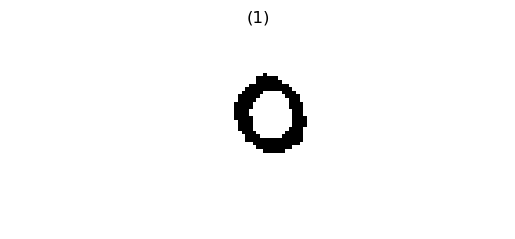

out ['0']


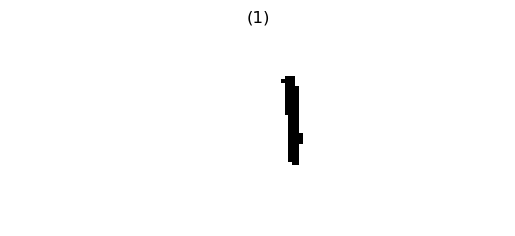

out ['1']


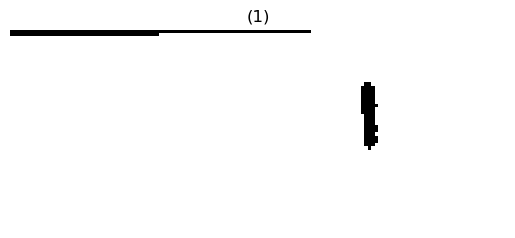

out ['1']


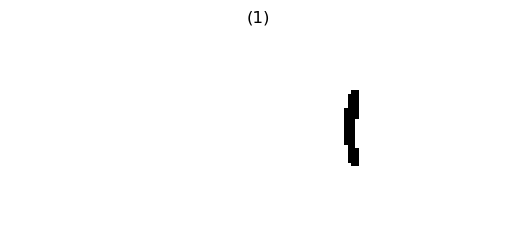

out ['1']


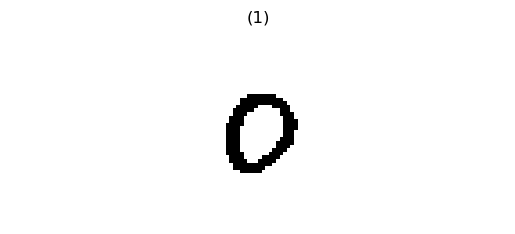

out ['0']


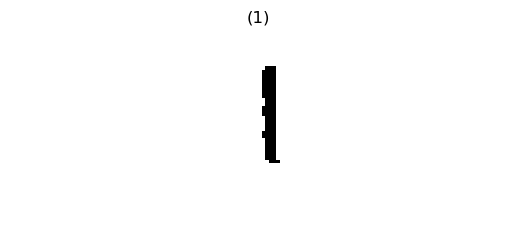

out ['1']


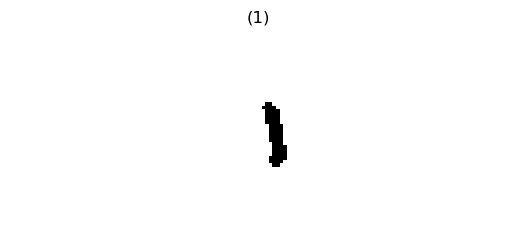

out ['1']


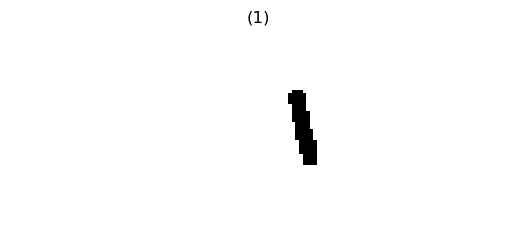

out ['1']


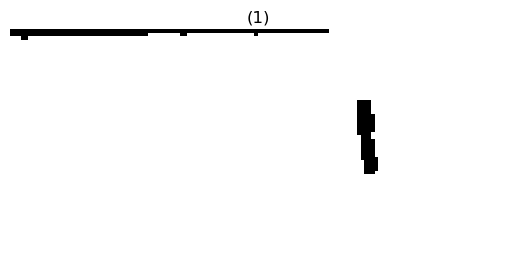

out ['1']


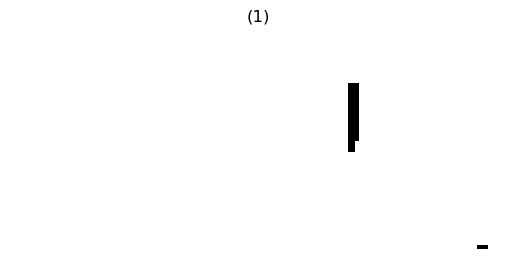

out ['1']


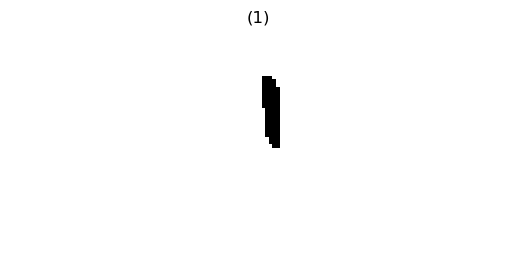

out ['1']


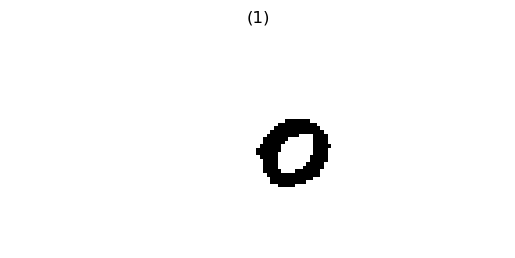

out ['0']


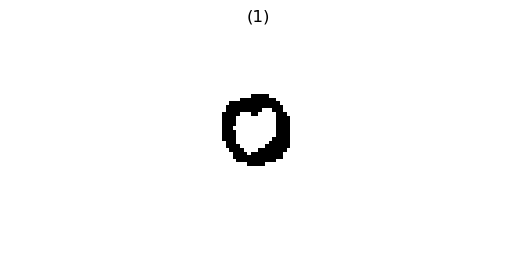

out ['0']


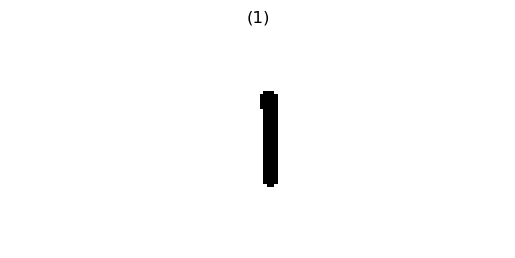

out ['1']


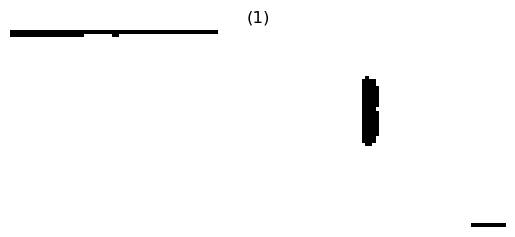

out ['1']


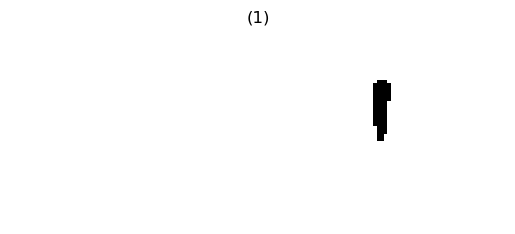

out ['1']


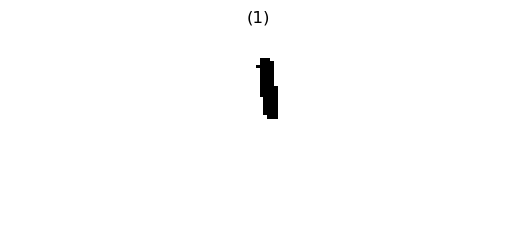

out ['1']


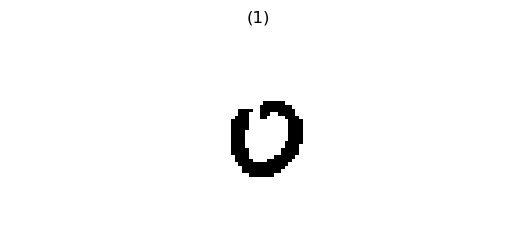

out ['0']


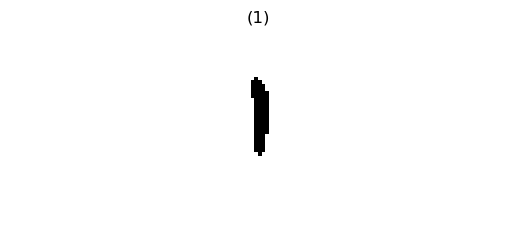

out ['1']


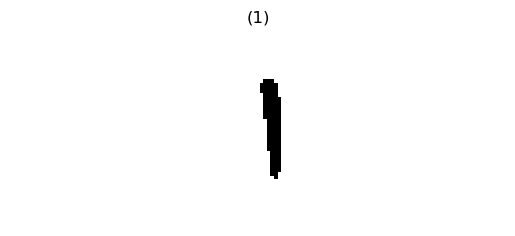

out ['1']


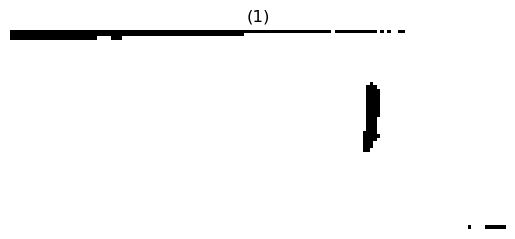

out ['1']


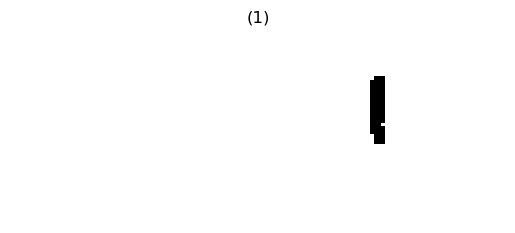

out ['1']


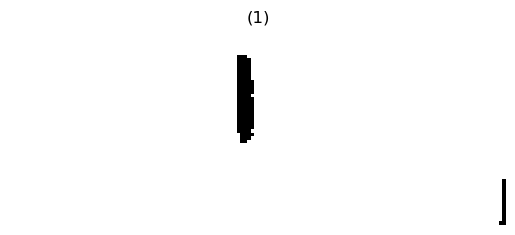

out ['1']


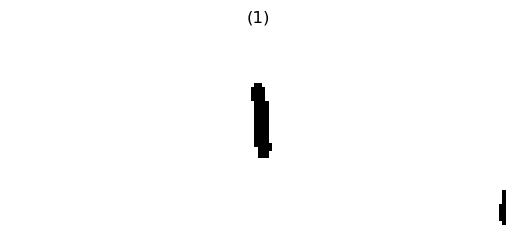

out ['1']


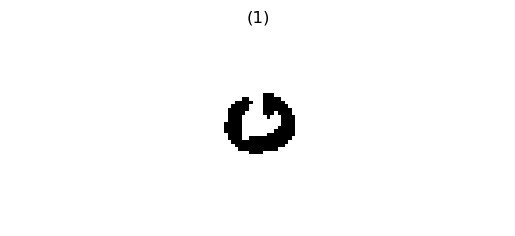

out ['0']


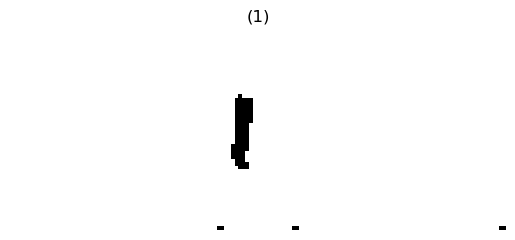

out ['1']


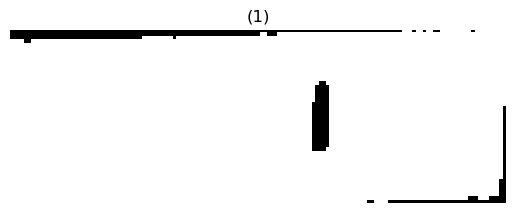

out ['1']


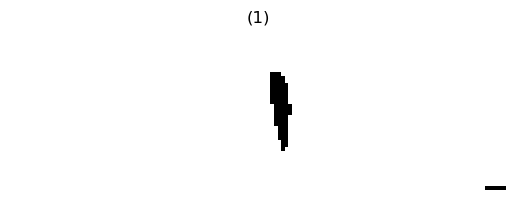

out ['1']


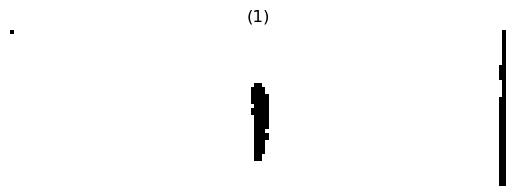

out ['1']


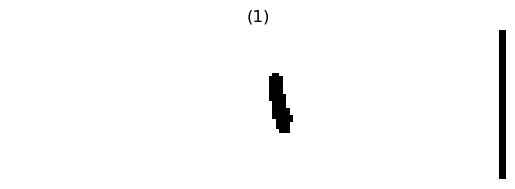

out ['1']


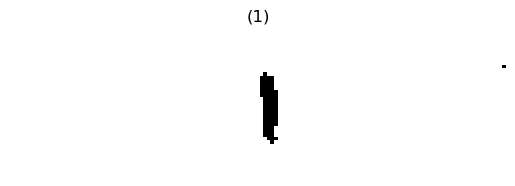

out ['1']


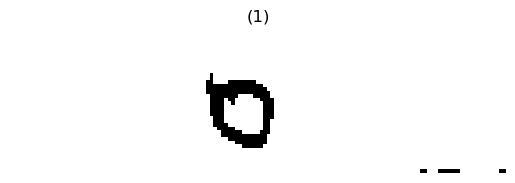

out ['0']
[array(['A'], dtype='<U1'), array(['D'], dtype='<U1'), array(['B'], dtype='<U1'), array(['D'], dtype='<U1'), array(['E'], dtype='<U1'), array(['F'], dtype='<U1')]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
rows numbers 33
cols numbers 6
num_outputs: 1
F0 =  b'  +  d'  +  a'e  +  ce'  +  ac'  +  

F0 =  b'  +  d'  +  c'e  +  a'c  +  ae'  +  



In [589]:
image = cv2.imread("./test_images/exs/t36.jpg") # TEST R
image = cv2.imread("./test_images/exs/t35.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t40.jpg") # TEST R


# image = cv2.imread("./test_images/exs/t34.jpg") # TEST R

# image = cv2.imread("./test_images/exs/t33.jpg") 
image = cv2.imread("./test_images/exs/t39.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t38.jpg") # TEST R

result = solve_expression(image, is_table=True, showTrace=False)